In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import calendar
from datetime import date

%run ../db.py
%run ../database.py
%run ../utils.py

In [ ]:
cgreen = '#27ae60'
cblue = '#2980b9'
cred = '#c0392b'
corange = '#d35400'
cgrey = '#7f8c8d'
cdark = '#2c3e50'
cwithe = '#ecf0f1'

figsize = (10, 6)

In [ ]:
spec = {
    'data_base': 'Mês',
    'dotacao_inicial': 'Dotação Inicial',
    'dotacao_atualizada': 'Dotação Atualizada',
    'empenhado': 'Empenhado',
    'liquidado': 'Liquidado',
    'pago': 'Pago',
    'dotacao_a_empenhar': 'A Empenhar',
    'empenhado_a_liquidar': 'A Liquidar',
    'liquidado_a_pagar': 'A Pagar'
}
fmt = {
    'data_base': date_to_month_name,
    'dotacao_inicial': money_formatter,
    'dotacao_atualizada': money_formatter,
    'empenhado': money_formatter,
    'liquidado': money_formatter,
    'pago': money_formatter,
    'dotacao_a_empenhar': money_formatter,
    'empenhado_a_liquidar': money_formatter,
    'liquidado_a_pagar': money_formatter
}

In [ ]:
def plot_acumulado(df, titulo):
    fig, ax = plt.subplots(figsize=figsize)
    fig.suptitle(titulo, x=0, fontsize=16)
    plt.title('valores acumulados', x=0)
    x = df['data_base'].dt.strftime('%b')
    plt.plot(x, df['dotacao_atualizada'], color=cblue, label='Dotação', linestyle='--')
    plt.plot(x, df['empenhado'], color=cred, label="Empenhado", marker='o')
    plt.plot(x, df['liquidado'], color=corange, label='Liquidado', marker='^')
    plt.plot(x, df['pago'], color=cgrey, label='Pago', marker='s')
    plt.ylim(bottom=0)
    plt.xticks(x)
    ax.yaxis.set_major_formatter(int_formatter)
    plt.legend(loc='best', ncol=4)
    plt.show()
    
def adiciona_data_base(df):
    last_day_of_month = []
    for month in range(df['data_base'].max().month + 1, 13):
        last_day_of_month.append(date(2023, month, calendar.monthrange(2023, month)[1]))
    for dt in last_day_of_month:
        n = pd.DataFrame([{'data_base': dt}])
        df = pd.concat([df, n])
    df = df.reset_index(drop=True)
    #df = df.drop('index', axis=1)
    return df
    


# Despesas

Nesta parte são demonstradas as despesas da **Prefeitura**, excluídas, portanto, as receias do *RPPS* e da *Câmara de Vereadores*. As despesas *intra-orçamentárias* executadas são incluídas nos valores.

## Despesa Total

In [ ]:
nome_despesa = 'Despesa Total'
sql = f'''
SELECT
    data_final AS data_base,
    SUM(dotacao_inicial) AS dotacao_inicial,
    SUM(dotacao_atualizada) AS dotacao_atualizada,
    SUM(valor_empenhado) AS empenhado,
    SUM(valor_liquidado) AS liquidado,
    SUM(valor_pago) AS pago,
    SUM(dotacao_a_empenhar) AS dotacao_a_empenhar,
    SUM(empenhado_a_liquidar) AS empenhado_a_liquidar,
    SUM(liquidado_a_pagar) AS liquidado_a_pagar
FROM pad."BAL_DESP"
WHERE
    controle BETWEEN {controle_ano}01 AND {controle_mes}
    AND entidade LIKE 'pm'
GROUP BY
    data_base
ORDER BY
    data_base ASC
'''
#print(sql)
despesa_atual = sqldf(sql)

despesa = adiciona_data_base(despesa_atual)
despesa['data_base'] = pd.to_datetime(despesa['data_base'], format='%Y-%m-%d')


In [ ]:
acumulado = despesa.copy()
plot_acumulado(acumulado, nome_despesa)

In [ ]:
df = df_table(acumulado.copy(), spec, fmt)
df.style.set_caption(f'{nome_despesa} - valores acumulados - {dt.year}').hide(axis='index')
#df

## Despesa Corrente

In [148]:
nome_despesa = 'Despesa Corrente'
sql = f'''
SELECT
    data_final AS data_base,
    SUM(dotacao_inicial) AS dotacao_inicial,
    SUM(dotacao_atualizada) AS dotacao_atualizada,
    SUM(valor_empenhado) AS empenhado,
    SUM(valor_liquidado) AS liquidado,
    SUM(valor_pago) AS pago,
    SUM(dotacao_a_empenhar) AS dotacao_a_empenhar,
    SUM(empenhado_a_liquidar) AS empenhado_a_liquidar,
    SUM(liquidado_a_pagar) AS liquidado_a_pagar
FROM pad."BAL_DESP"
WHERE
    controle BETWEEN {controle_ano}01 AND {controle_mes}
    AND entidade LIKE 'pm'
    AND elemento LIKE '3%%'
GROUP BY
    data_base
ORDER BY
    data_base ASC
'''
#print(sql)
despesa_atual = sqldf(sql)

despesa = adiciona_data_base(despesa_atual)
despesa['data_base'] = pd.to_datetime(despesa['data_base'], format='%Y-%m-%d')


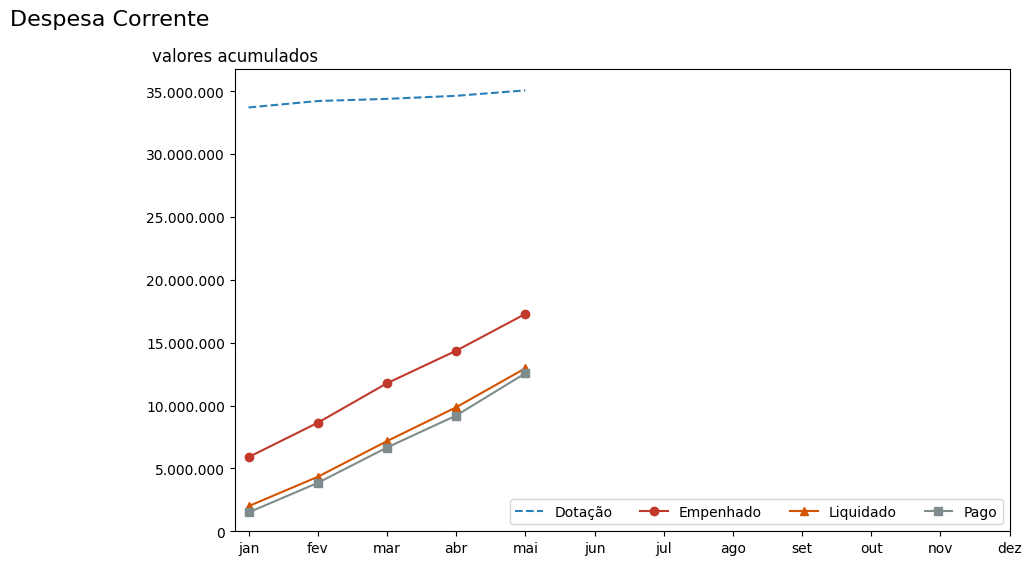

In [149]:
acumulado = despesa.copy()
plot_acumulado(acumulado, nome_despesa)

In [ ]:
df = df_table(acumulado.copy(), spec, fmt)
df.style.set_caption(f'{nome_despesa} - valores acumulados - {dt.year}').hide(axis='index')
#df

## Despesa com Pessoal e Encargos Sociais

In [ ]:
nome_despesa = 'Despesa Corrente'
sql = f'''
SELECT
    data_final AS data_base,
    SUM(dotacao_inicial) AS dotacao_inicial,
    SUM(dotacao_atualizada) AS dotacao_atualizada,
    SUM(valor_empenhado) AS empenhado,
    SUM(valor_liquidado) AS liquidado,
    SUM(valor_pago) AS pago,
    SUM(dotacao_a_empenhar) AS dotacao_a_empenhar,
    SUM(empenhado_a_liquidar) AS empenhado_a_liquidar,
    SUM(liquidado_a_pagar) AS liquidado_a_pagar
FROM pad."BAL_DESP"
WHERE
    controle BETWEEN {controle_ano}01 AND {controle_mes}
    AND entidade LIKE 'pm'
    AND elemento LIKE '31%%'
GROUP BY
    data_base
ORDER BY
    data_base ASC
'''
#print(sql)
despesa_atual = sqldf(sql)

despesa = adiciona_data_base(despesa_atual)
despesa['data_base'] = pd.to_datetime(despesa['data_base'], format='%Y-%m-%d')


In [ ]:
acumulado = despesa.copy()
plot_acumulado(acumulado, nome_despesa)

In [ ]:
df = df_table(acumulado.copy(), spec, fmt)
df.style.set_caption(f'{nome_despesa} - valores acumulados - {dt.year}').hide(axis='index')
#df

## Despesa de Custeio

Outras despesas correntes, exceto pessoal, encargos sociais e juros da dívida.

In [ ]:
nome_despesa = 'Despesa de Custeio'
sql = f'''
SELECT
    data_final AS data_base,
    SUM(dotacao_inicial) AS dotacao_inicial,
    SUM(dotacao_atualizada) AS dotacao_atualizada,
    SUM(valor_empenhado) AS empenhado,
    SUM(valor_liquidado) AS liquidado,
    SUM(valor_pago) AS pago,
    SUM(dotacao_a_empenhar) AS dotacao_a_empenhar,
    SUM(empenhado_a_liquidar) AS empenhado_a_liquidar,
    SUM(liquidado_a_pagar) AS liquidado_a_pagar
FROM pad."BAL_DESP"
WHERE
    controle BETWEEN {controle_ano}01 AND {controle_mes}
    AND entidade LIKE 'pm'
    AND elemento LIKE '33%%'
GROUP BY
    data_base
ORDER BY
    data_base ASC
'''
#print(sql)
despesa_atual = sqldf(sql)

despesa = adiciona_data_base(despesa_atual)
despesa['data_base'] = pd.to_datetime(despesa['data_base'], format='%Y-%m-%d')


In [ ]:
acumulado = despesa.copy()
plot_acumulado(acumulado, nome_despesa)

In [ ]:
df = df_table(acumulado.copy(), spec, fmt)
df.style.set_caption(f'{nome_despesa} - valores acumulados - {dt.year}').hide(axis='index')
#df

## Despesa por Órgãos

In [152]:
nome_despesa = 'Despesa por Órgãos'
sql = f'''
SELECT
    nome_orgao,
    SUM(valor_liquidado) AS liquidado
FROM pad."BAL_DESP"
WHERE
    controle = {controle_mes}
    AND entidade LIKE 'pm'
GROUP BY
    nome_orgao
ORDER BY
    liquidado DESC
'''
#print(sql)
despesa_atual = sqldf(sql)

despesa = despesa_atual


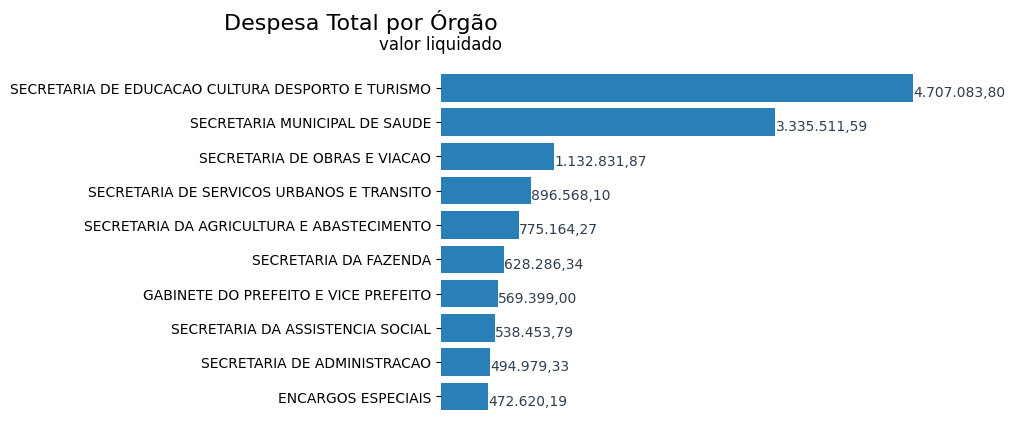

In [155]:
fig, ax = plt.subplots()
fig.suptitle('Despesa Total por Órgão', x=0, fontsize=16)
plt.title('valor liquidado', x=0)
orgaos = despesa['nome_orgao']
ax.barh(orgaos, despesa['liquidado'], color=cblue)
ax.invert_yaxis()
for i, v in enumerate(despesa['liquidado']):
    ax.text(v + 3, i + 0.25, money_formatter(v), color=cdark)
ax.set_xticks([])
ax.set_frame_on(False)
plt.show()

In [156]:
df = df_table(despesa.copy(), spec={
    'nome_orgao': 'Órgão',
    'liquidado': 'Liquidado'
}, fmt={
    'liquidado': money_formatter
})
df.style.set_caption(f'{nome_despesa} - valores acumulados - {dt.year}').hide(axis='index')
#df

Órgão,Liquidado
SECRETARIA DE EDUCACAO CULTURA DESPORTO E TURISMO,"4.707.083,80"
SECRETARIA MUNICIPAL DE SAUDE,"3.335.511,59"
SECRETARIA DE OBRAS E VIACAO,"1.132.831,87"
SECRETARIA DE SERVICOS URBANOS E TRANSITO,"896.568,10"
SECRETARIA DA AGRICULTURA E ABASTECIMENTO,"775.164,27"
SECRETARIA DA FAZENDA,"628.286,34"
GABINETE DO PREFEITO E VICE PREFEITO,"569.399,00"
SECRETARIA DA ASSISTENCIA SOCIAL,"538.453,79"
SECRETARIA DE ADMINISTRACAO,"494.979,33"
ENCARGOS ESPECIAIS,"472.620,19"
